# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Your observations here
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Text(0.5, 0.98, 'Histograms of various features')

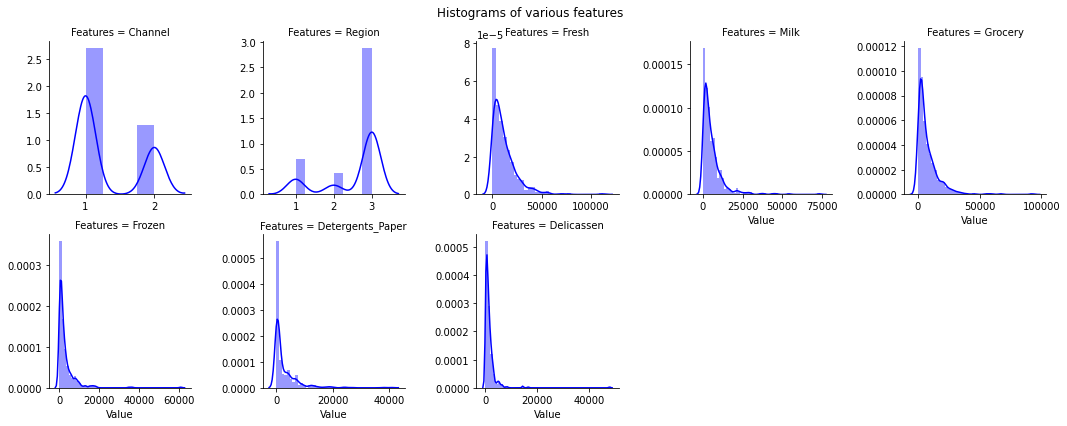

In [6]:
import seaborn as sns
numeric_features= customers.select_dtypes(exclude=["category"])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
g = sns.FacetGrid(data =numeric_features, col="Features",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "Value", color ='blue')
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")

D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Data-Ironhack\Apps\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Data-Ironhack\Apps\ANACONDA\lib\site-package

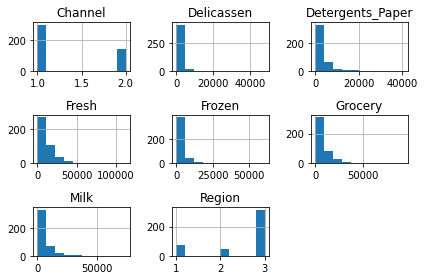

In [7]:
customers.hist()
plt.tight_layout()

In [8]:
customers.describe([x/100 for x in range(90,100)]).T

,count,mean,std,min,50%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
Channel,440.0,1.322727,0.468052,1.0,1.0,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,3.0,3.0,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,8504.0,27090.5,28075.44,29725.88,31083.28,32409.30,36818.50,39426.44,42705.42,46047.66,56082.61,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,3627.0,12229.9,12785.35,13250.56,14705.80,15727.98,16843.40,20788.76,22947.87,27659.88,37610.06,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,4755.5,18910.1,19831.19,20386.16,21541.53,22241.40,24033.50,26546.12,28856.23,32437.84,43435.74,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,1526.0,7545.3,8007.56,8305.88,8692.27,9475.32,9930.75,10985.76,13208.04,15807.14,17964.82,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,816.5,7438.3,7849.85,8672.64,9048.92,9917.18,12043.20,12611.68,14148.47,17927.88,22571.61,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,965.5,2945.9,3108.92,3181.88,3491.94,3942.58,4485.40,5120.44,5202.43,6276.84,8274.66,47943.0


In [9]:
customers.Channel.unique()

array([2, 1], dtype=int64)

In [10]:
customers.Region.unique()

array([3, 1, 2], dtype=int64)

In [11]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


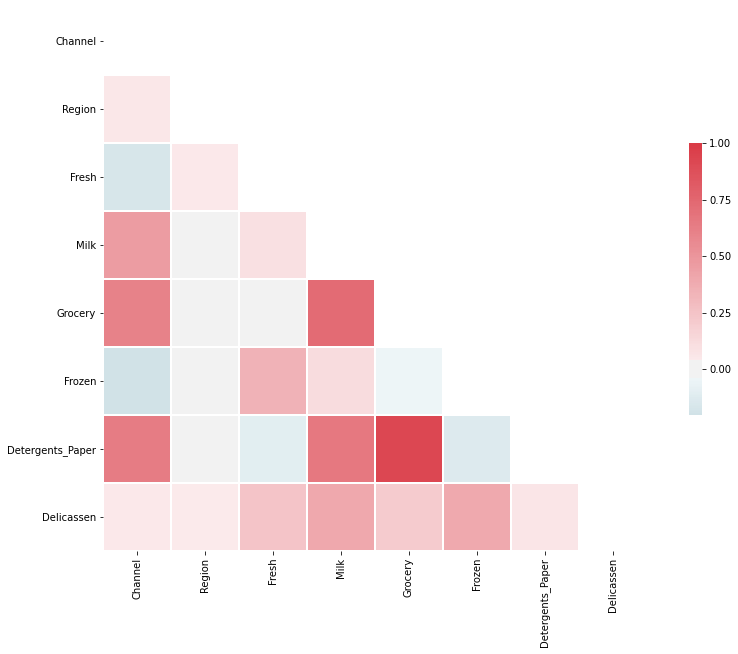

In [12]:
import seaborn as sns
corr=customers.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [13]:
pareto=pd.DataFrame(customers.iloc[:,2:].copy().sum(),columns=['Total costos']).sort_values('Total costos',ascending=False)
pareto['Acumulado']=pareto["Total costos"].cumsum()/pareto["Total costos"].sum()*100

In [14]:
pareto.head()

,Total costos,Acumulado
Fresh,5280131,36.117042
Grocery,3498562,60.047833
Milk,2550357,77.492732
Frozen,1351650,86.738261
Detergents_Paper,1267857,95.410630


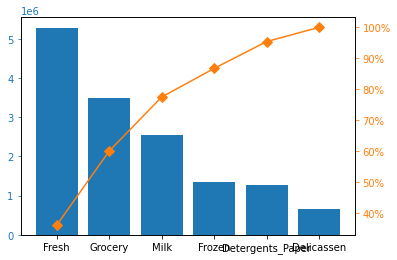

In [15]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots()
ax.bar(pareto.index, pareto["Total costos"], color="C0")
ax2 = ax.twinx()
ax2.plot(pareto.index, pareto["Acumulado"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [16]:
customers.shape

(440, 8)

In [17]:
# Your code here Outlier
df_out=customers.copy()
cols=customers.columns
for i in cols[2:]:
    df_out=df_out[df_out[i]<customers[i].quantile(.99)]
    
df_out.reset_index(inplace=True,drop=True)    

In [18]:
df_out.shape

(421, 8)

In [19]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 8 columns):
Channel             421 non-null int64
Region              421 non-null int64
Fresh               421 non-null int64
Milk                421 non-null int64
Grocery             421 non-null int64
Frozen              421 non-null int64
Detergents_Paper    421 non-null int64
Delicassen          421 non-null int64
dtypes: int64(8)
memory usage: 26.4 KB


In [20]:
df_out.describe([x/100 for x in range(90,100)]).T

,count,mean,std,min,50%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
Channel,421.0,1.320665,0.467288,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Region,421.0,2.536817,0.778704,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Fresh,421.0,10752.819477,9975.433966,3.0,8040.0,24904.0,25638.2,26455.6,27359.6,29613.2,30379.0,31733.6,36904.6,40024.0,43027.6,53205.0
Milk,421.0,5112.149644,5048.574442,55.0,3587.0,11114.0,11767.0,12452.6,12857.8,13303.2,14881.0,15903.0,18248.8,21679.6,24762.2,29892.0
Grocery,421.0,7134.558195,7052.204654,3.0,4602.0,16709.0,17840.4,19287.2,19853.6,21066.6,22182.0,23676.4,26100.6,27872.0,31675.8,39694.0
Frozen,421.0,2598.681710,2998.285143,25.0,1457.0,6404.0,6942.4,7591.2,8151.2,8357.0,8853.0,9614.2,10214.2,12165.0,14762.8,17866.0
Detergents_Paper,421.0,2547.320665,3594.282986,3.0,811.0,7015.0,7451.6,7844.0,8650.8,8961.8,9836.0,11833.2,12488.4,13668.8,16789.8,19410.0
Delicassen,421.0,1261.033254,1240.865876,3.0,898.0,2749.0,2874.6,3055.4,3161.6,3269.8,3636.0,4378.0,4891.4,5134.2,5846.8,7844.0


In [21]:
df_dum=pd.get_dummies(df_out,columns=['Channel','Region'],drop_first=True)

In [22]:
df_dum.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,1,0,1
1,7057,9810,9568,1762,3293,1776,1,0,1
2,6353,8808,7684,2405,3516,7844,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,1


In [23]:
df_dum.drop('Detergents_Paper',axis=1,inplace=True)
df_dum.head()

,Fresh,Milk,Grocery,Frozen,Delicassen,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,1338,1,0,1
1,7057,9810,9568,1762,1776,1,0,1
2,6353,8808,7684,2405,7844,1,0,1
3,13265,1196,4221,6404,1788,0,0,1
4,22615,5410,7198,3915,5185,1,0,1


Text(0.5, 0.98, 'Histograms of various features')

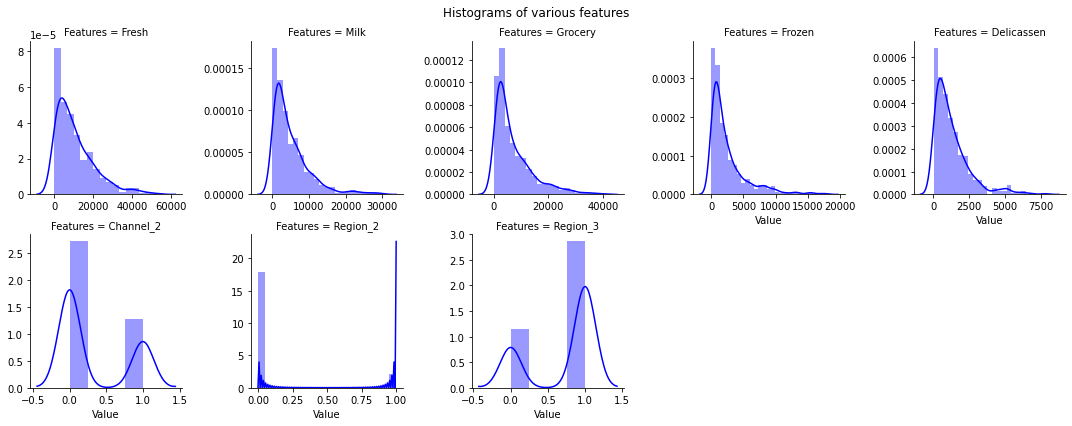

In [24]:
numeric_features= df_dum.select_dtypes(exclude=["category"])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
g = sns.FacetGrid(data =numeric_features, col="Features",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "Value", color ='blue')
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")

In [25]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [26]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler=scaler.fit(df_dum)
customer_scale=scaler.transform(df_dum)
customer_scale_df=pd.DataFrame(customer_scale, columns=df_dum.columns)

In [27]:
customer_scale_df.head()

,Fresh,Milk,Grocery,Frozen,Delicassen,Channel_2,Region_2,Region_3
0,0.192318,0.901097,0.060541,-0.796295,0.062100,1.455513,-0.345949,0.631404
1,-0.370933,0.931637,0.345472,-0.279385,0.415500,1.455513,-0.345949,0.631404
2,-0.441590,0.732929,0.078003,-0.064674,5.311452,1.455513,-0.345949,0.631404
3,0.252136,-0.776617,-0.413633,1.270675,0.425182,-0.687043,-0.345949,0.631404
4,1.190554,0.059067,0.009007,0.439546,3.166044,1.455513,-0.345949,0.631404


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [28]:
# Your code here:

X=customer_scale_df
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer
#Your code here:
scores = []
inertias = []
values = np.arange(2, 10)

for num_clusters in values:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)
    print('Intertia for current cluster = ', kmeans.inertia_)
    scores.append(score)
    inertias.append(kmeans.inertia_)


Number of clusters = 2
Silhouette score = 0.29522145118308474
Intertia for current cluster =  2529.273981941426

Number of clusters = 3
Silhouette score = 0.32870923528539425
Intertia for current cluster =  2078.1025934466247

Number of clusters = 4
Silhouette score = 0.29396763731230074
Intertia for current cluster =  1791.5911957562844

Number of clusters = 5
Silhouette score = 0.3094317127401576
Intertia for current cluster =  1592.551320756241

Number of clusters = 6
Silhouette score = 0.3094159159961564
Intertia for current cluster =  1415.4129318424734

Number of clusters = 7
Silhouette score = 0.3230762358564207
Intertia for current cluster =  1269.9985964882278

Number of clusters = 8
Silhouette score = 0.32889090701425727
Intertia for current cluster =  1160.5029569977821

Number of clusters = 9
Silhouette score = 0.34670963889935735
Intertia for current cluster =  1062.2392687489191


In [30]:
kmeans=KMeans(n_clusters=7, init = 'random', max_iter = 1, random_state = 5)
kmeans=kmeans.fit(X)
y_pred= kmeans.predict(X)
labels=kmeans.labels_

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y_pred)))

Model 1 Silhouette Score: 0.3071500646539427


In [31]:
df_out['labels']=labels
df_out.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


Count the values in `labels`.

In [32]:
# Your code here:
df_out.labels.value_counts()

6    170
3    101
4     54
0     34
2     28
5     17
1     17
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [33]:
# Your code here
from sklearn.cluster import DBSCAN
db= DBSCAN(eps=.5)
db.fit(customer_scale_df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [34]:
labels2 = db.labels_

In [35]:
df_out['labels_DBSCAN']=labels2

Count the values in `labels_DBSCAN`.

In [36]:
# Your code here
df_out.labels_DBSCAN.value_counts()


-1    329
 0     80
 2      7
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

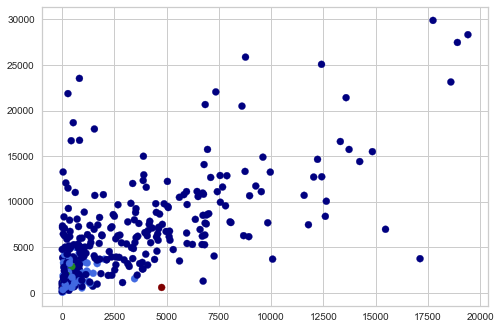

In [44]:
# Your code here:
#DBSCAN
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_out.Detergents_Paper, df_out.Milk, c=vectorizer(labels2))


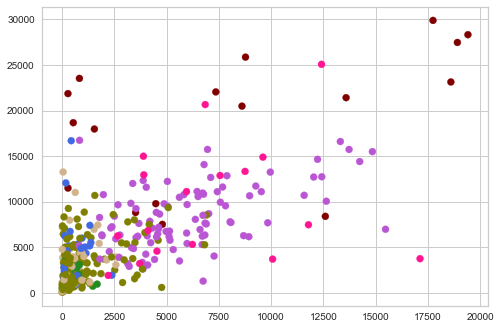

In [45]:
#KMEANS
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_out.Detergents_Paper, df_out.Milk, c=vectorizer(labels))

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

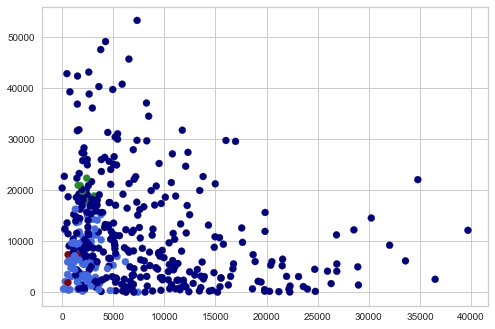

In [46]:
# Your code here:
#dbsacm
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_out.Grocery, df_out.Fresh, c=vectorizer(labels2))

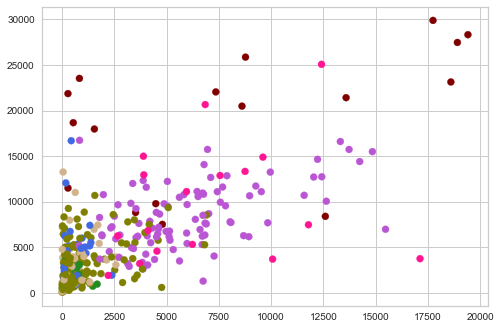

In [47]:
#KMEANS
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_out.Detergents_Paper, df_out.Milk, c=vectorizer(labels))

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

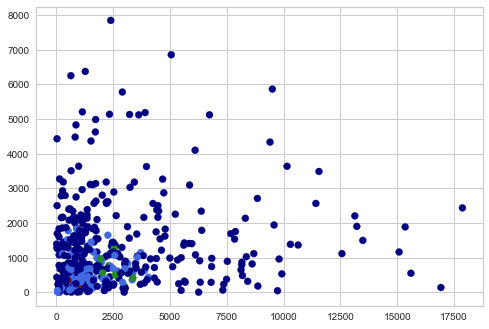

In [49]:
# Your code here:
#dbscan
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_out.Frozen, df_out.Delicassen, c=vectorizer(labels2))

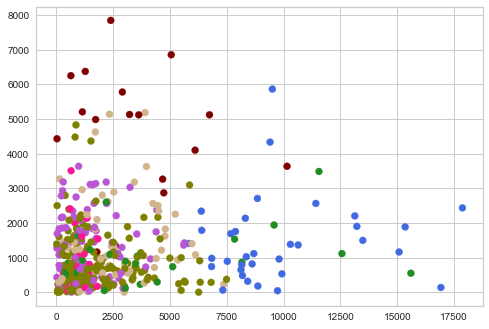

In [48]:
#KMEANS
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_out.Frozen, df_out.Delicassen, c=vectorizer(labels))

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [50]:
# Your code here:
df_out.groupby(['labels']).mean()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.058824,2.764706,16137.176471,4089.970588,3996.911765,9800.147059,587.411765,1475.617647,-1.000000
1,1.705882,2.294118,8823.529412,19212.058824,20286.764706,3469.352941,8342.823529,4674.352941,-1.000000
2,1.035714,2.000000,11082.892857,1737.964286,4006.821429,3983.964286,449.142857,1030.071429,-1.000000
3,1.990099,2.702970,7443.099010,8222.673267,13693.445545,1355.910891,5871.396040,1283.049505,-1.000000
4,1.055556,2.592593,28295.907407,3193.814815,4069.500000,2585.648148,646.425926,1550.870370,-0.722222
5,2.000000,2.000000,6654.000000,9924.529412,14127.000000,1034.176471,7138.882353,1108.235294,-1.000000
6,1.000000,2.541176,6618.247059,2742.441176,3339.635294,1742.100000,875.100000,824.958824,-0.435294


In [51]:
df_out.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.410334,2.43769,11734.334347,6073.401216,8526.462006,2913.890578,3117.094225,1448.255319,3.510638
0,1.000000,3.00000,6190.775000,1724.137500,2216.850000,1415.875000,483.412500,600.587500,6.000000
1,1.000000,1.00000,6509.800000,954.200000,1143.600000,848.800000,1118.800000,342.000000,6.000000
2,1.000000,3.00000,19790.000000,1623.428571,2196.714286,2551.571429,375.857143,666.000000,4.571429


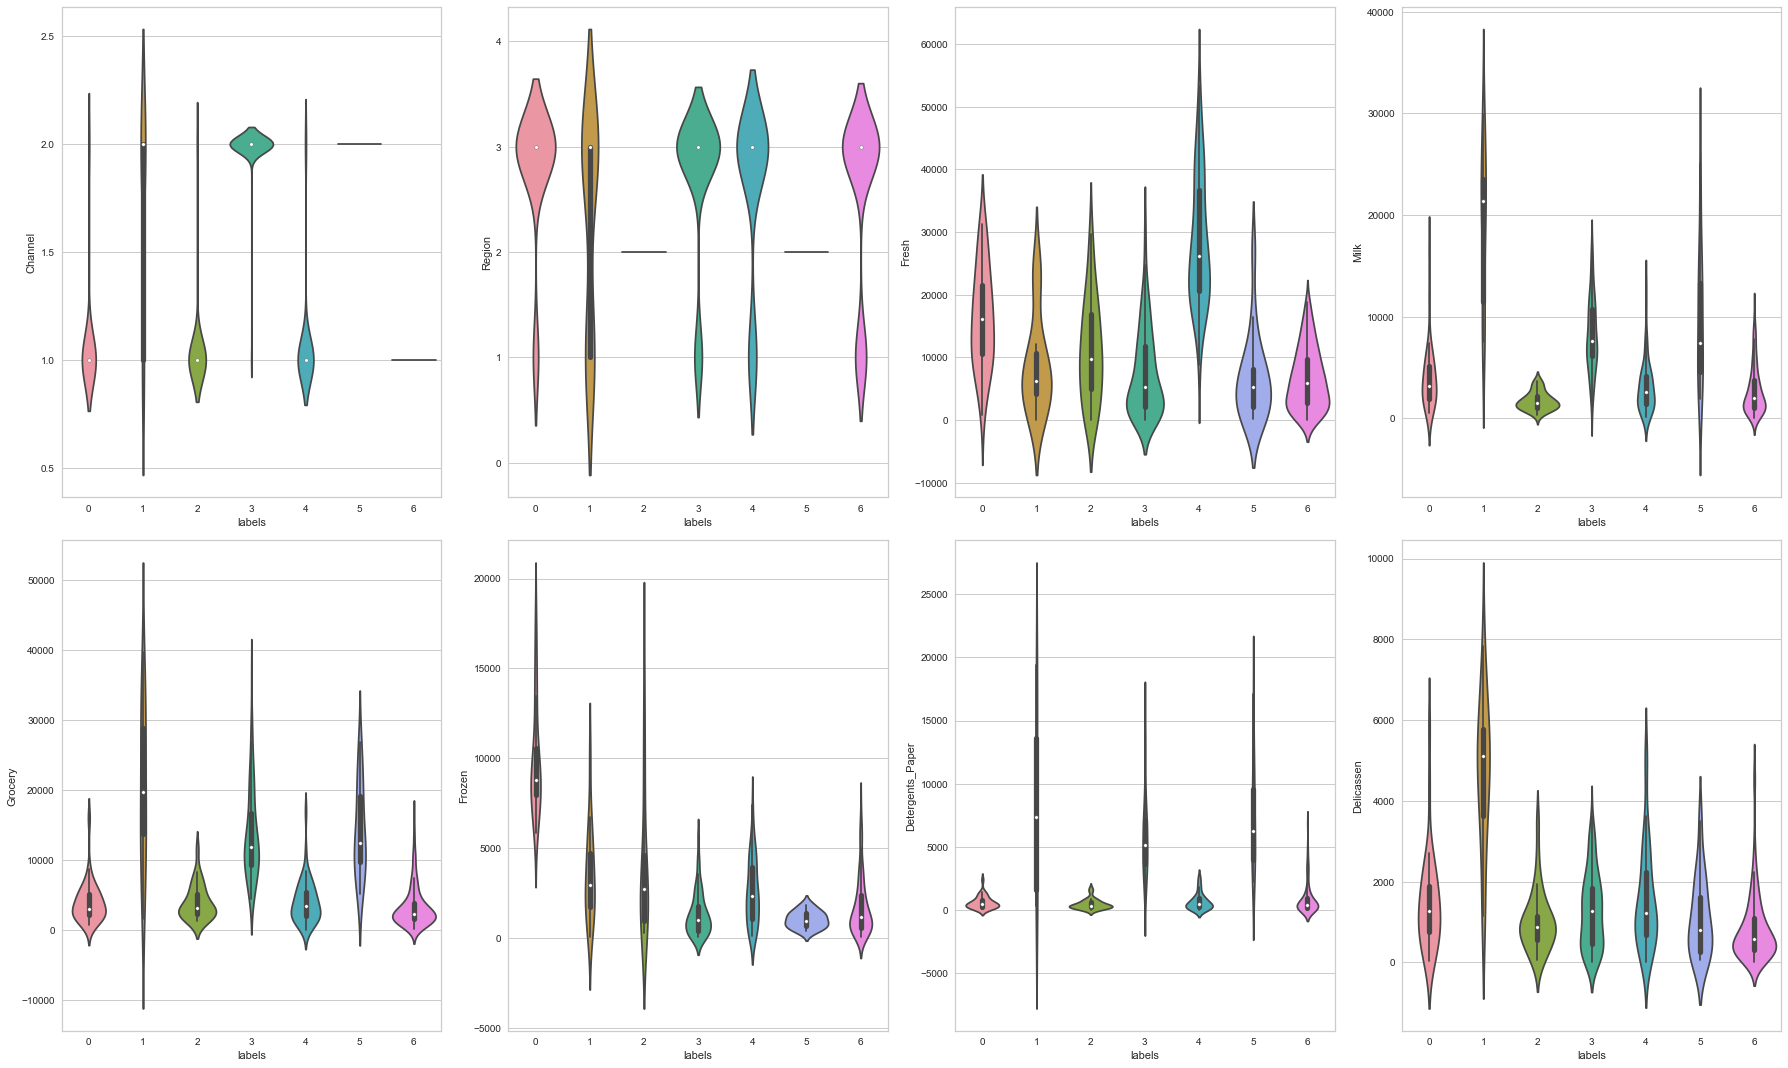

In [58]:
fig, axes = plt.subplots(2,4, figsize=(25,15))
for i,ax in enumerate(axes.flat):
    sns.violinplot(x='labels', y=df_out.columns[i], data=df_out,ax=ax)
    ax.set_xlabel('labels')
    ax.set_ylabel(df_out.columns[i])
plt.tight_layout()

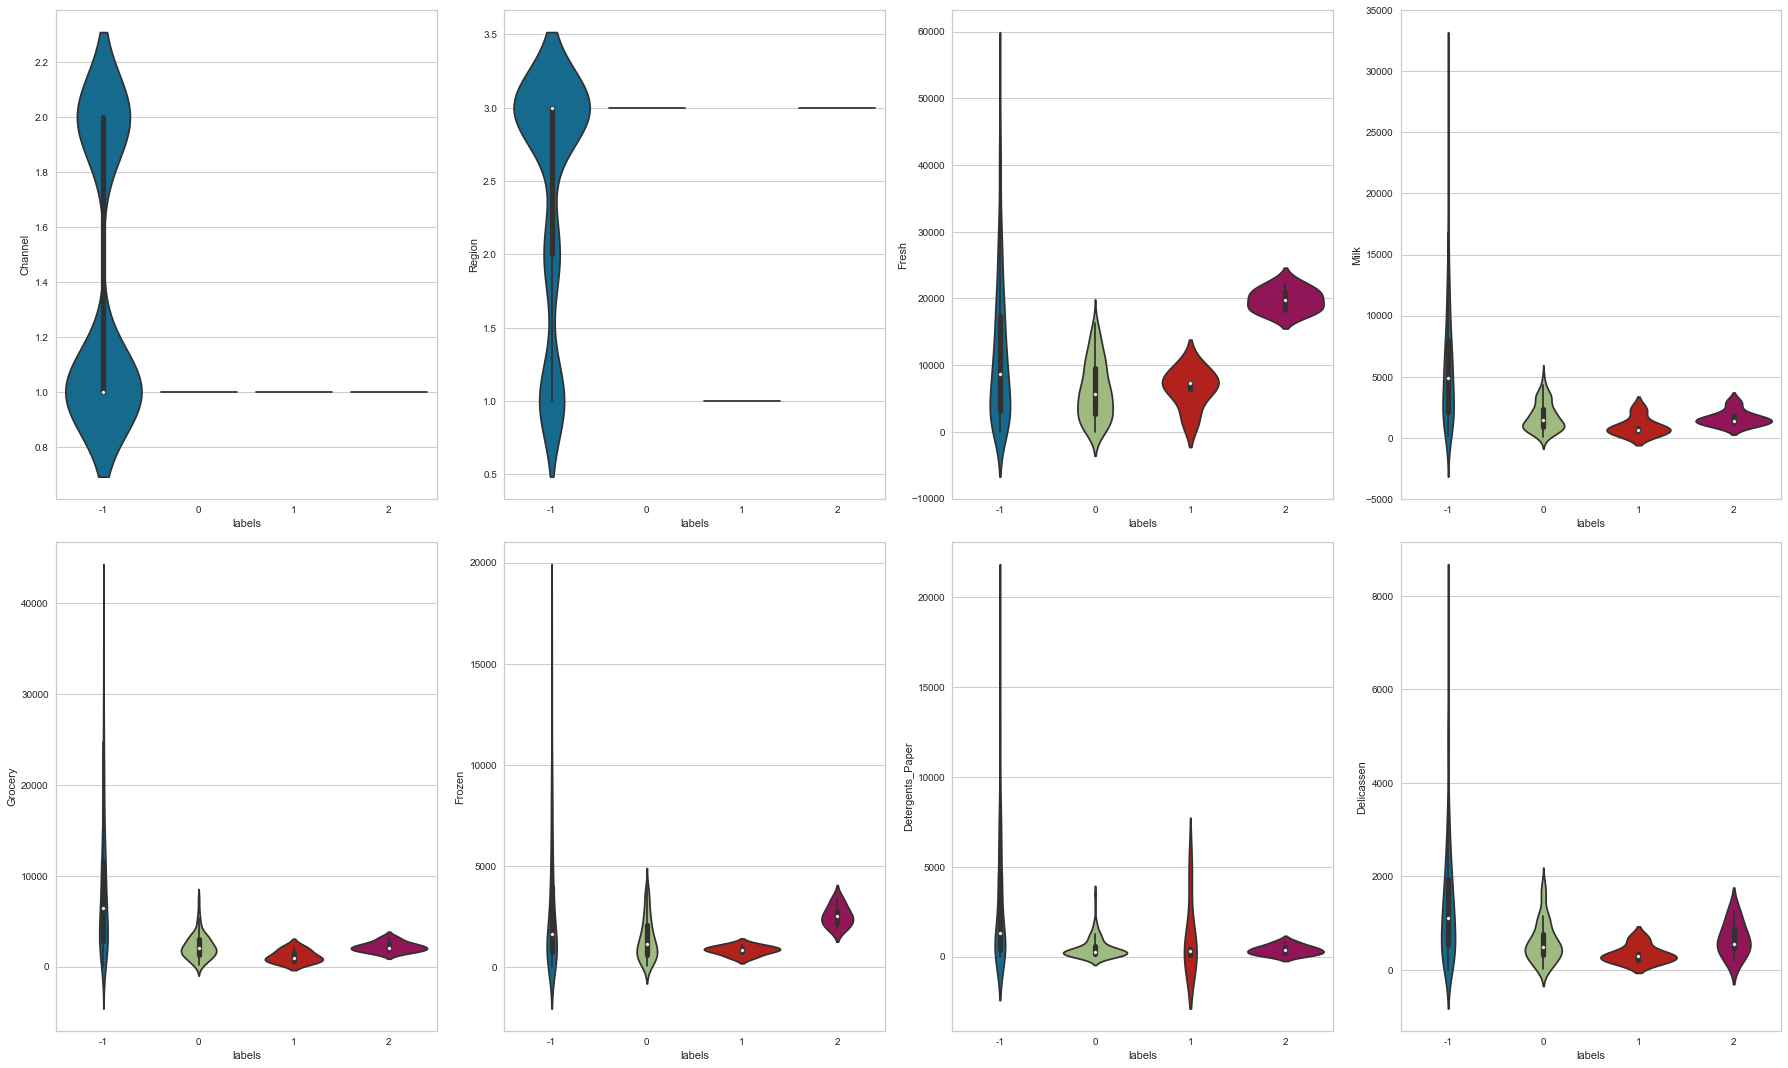

In [59]:
fig, axes = plt.subplots(2,4, figsize=(25,15))
for i,ax in enumerate(axes.flat):
    sns.violinplot(x='labels_DBSCAN', y=df_out.columns[i], data=df_out,ax=ax)
    ax.set_xlabel('labels')
    ax.set_ylabel(df_out.columns[i])
plt.tight_layout()

Which algorithm appears to perform better?

# Your observations here

DBSCAN porque los clusters se ven un poco mas y en kmeans tal vez con un menor numero de clusters se clasifique mejor

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here